In [1]:
import pymc3 as pm
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [9]:
p_grid = np.linspace(0, 1, 1000)
prior = np.ones(1000)
likelihood = stats.binom.pmf(6, n=9, p=p_grid)
posterior = likelihood * prior
posterior = posterior / posterior.sum()

In [113]:
np.random.seed(10)
samples = np.random.choice(p_grid, p=posterior, size=10000, replace=True)

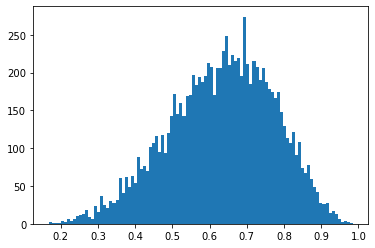

In [114]:
plt.hist(samples, bins=100);None

In [115]:
print("how much posterior prob lies below p = 0.2? %.4f" % posterior[p_grid<0.2].sum())
print("how much posterior prob lies above p = 0.8? %.4f" % posterior[p_grid>=0.8].sum())
print("how much posterior prob lies between 0.2 and 0.8? %.4f" % posterior[(p_grid>=0.2) & (p_grid<0.8)].sum())

how much posterior prob lies below p = 0.2? 0.0009
how much posterior prob lies above p = 0.8? 0.1203
how much posterior prob lies between 0.2 and 0.8? 0.8788


In [116]:
print("20%% of the posterior prob lies below which values of p? %.4f" % np.percentile(samples, 20))
print("20%% of the posterior prob lies above which values of p? %.4f" % np.percentile(samples, 80))

20% of the posterior prob lies below which values of p? 0.5105
20% of the posterior prob lies above which values of p? 0.7578


In [117]:
print("which values of p contain the narrowest interval equal to 66%% of the posterior probability? %.4f, %.4f" % \
    tuple([*list(pm.stats.hdi(samples, hdi_prob=0.66))]))

which values of p contain the narrowest interval equal to 66% of the posterior probability? 0.5125, 0.7858


In [173]:
prior = np.ones(len(p_grid))
# prior[p_grid < 0.5] = 0
likelihood = stats.binom.pmf(8, n=15, p=p_grid)
posterior = likelihood * prior
posterior = posterior / posterior.sum()

np.random.seed(10)
samples = np.random.choice(p_grid, p=posterior, size=10000, replace=True)

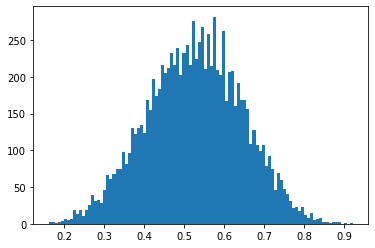

In [174]:
plt.hist(samples, bins=100);None

In [175]:
print("which values of p contain the narrowest interval equal to 66%% of the posterior probability? %.4f, %.4f" % \
    tuple([*list(pm.stats.hdi(samples, hdi_prob=0.9))]))

which values of p contain the narrowest interval equal to 66% of the posterior probability? 0.3293, 0.7197


### 3M3

In [176]:
s = stats.binom.rvs(size=10000, n=15, p=samples)
(s == 8).sum() / len(s)

0.1441

In [177]:
s = stats.binom.rvs(size=10000, n=9, p=samples)
(s == 6).sum() / len(s)

0.1737

### Hard exercises

In [178]:
birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0, 0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0, 1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,0,1,1,1,1])
birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0])

In [184]:
all = np.concatenate([birth1, birth2], axis=0)

In [193]:
p_grid = np.linspace(0, 1, 10000)
prior = np.ones(len(p_grid))
likelihood = stats.binom.pmf((all==1).sum(), len(all), p=p_grid)
posterior = prior*likelihood
posterior = posterior / sum(posterior)

0.5549554955495549

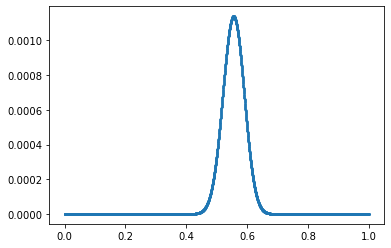

In [199]:
plt.scatter(p_grid, posterior, s=1)
p_grid[np.argmax(posterior)]

In [203]:
samples = np.random.choice(p_grid, p=posterior, size=10000, replace=True)

In [212]:
x = np.concatenate(
    [pm.stats.hdi(samples, hdi_prob=0.5), pm.stats.hdi(samples, hdi_prob=0.89), pm.stats.hdi(samples, hdi_prob=.97)]
, axis=0)
x.sort()
x

array([0.48194819, 0.49884988, 0.52875288, 0.57485749, 0.60746075,
       0.62926293])

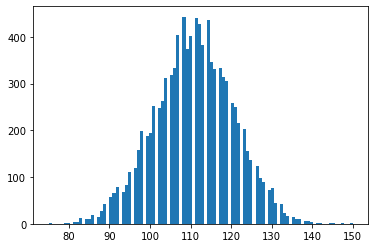

In [220]:
plt.hist(stats.binom.rvs(size=10000, n=200, p=samples), bins=100);None

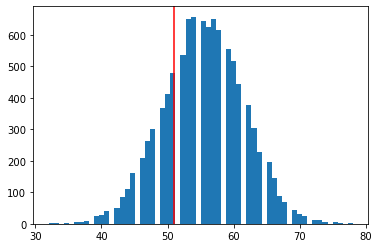

In [235]:
plt.hist(stats.binom.rvs(size=10000, n=100, p=samples), bins=60);None
plt.axvline(birth1.sum(), c="red")